In [382]:
# Linux - install python3-pyaudio 
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

1. SYGNAŁ AUDIO

Zadanie 1

Głos: https://ttsmp3.com/

Zadanie 2

In [383]:
s, fs = sf.read('glos.mp3', dtype='float32')

# sd.play(s, fs)
# sd.wait()

Zadanie 3

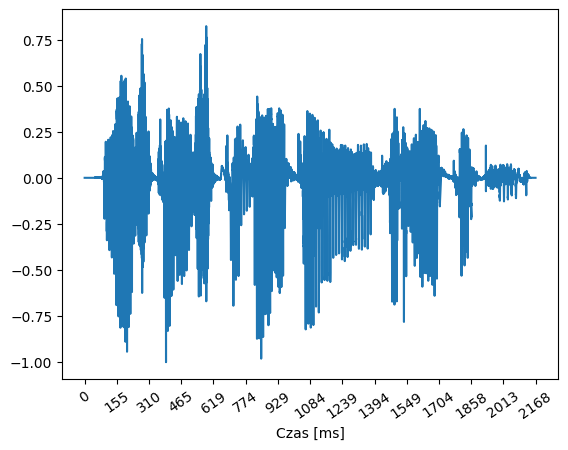

In [384]:
# sygnal_mono_lewy = s[:, 0] # jeśli stereo
# s = sygnal_mono_lewy
s /= np.max(np.abs(s)) # jeśli nie jest znormalizowany

czas_ms = len(s) / fs * 1000

x = np.linspace(0, czas_ms, len(s))

plt.plot(x, s);
plt.xlabel('Czas [ms]')
plt.xticks(np.linspace(0, czas_ms, 15), rotation=35);


Zadanie 4

Zadanie 5

2. Zastosowanie okien kroczących

Zadanie 1

In [385]:
ramka_10ms = fs * 0.01
liczba_ramek = len(s) // ramka_10ms
ramki = np.array_split(s, liczba_ramek)

E = [np.sum(np.power(ramka, 2)) for ramka in ramki]
E = np.array(E)

Z = np.empty_like(E)
for i, ramka in enumerate(ramki):
    zi = [0 if ramka[i] * ramka[i + 1] >= 0 else 1 for i in range(len(ramka) - 1)]
    Z[i] = np.sum(zi)

array([ 66.,  75.,  81.,  75., 102.,  14.,   2.,  16.,  50.,   8.,   6.,
        17.,  11.,  14.,   7.,   8.,   7.,   9.,   5.,   5.,   7.,   9.,
        16.,   4.,  68., 102., 128., 145., 158., 160., 137., 122.,  98.,
        96.,  40.,  69.,  83.,  20.,  16.,  13.,   8.,   6.,   4.,   4.,
         4.,   4.,   4.,   3.,   4.,   5.,   5.,  42.,  93., 129., 142.,
       140., 144., 150., 150., 147., 138., 134., 129.,  77.,   2.,   1.,
         0.,  32.,  34.,   2.,   2.,   5.,   6.,   4.,   2.,   1.,   1.,
         2.,   1.,   3.,  18.,   6.,   6.,  12.,  12.,  10.,   9.,  12.,
        19.,   7.,   3.,   3.,   2.,   3.,   2.,   3.,   3.,   6.,   2.,
         5.,   5.,   9.,  22.,  61.,  12.,   6.,  10.,   5.,   9.,  10.,
        16.,   7.,  15.,   4.,   2.,   3.,   3.,   3.,   2.,   3.,   4.,
         2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   5.,   2.,   4.,
         2.,   3.,   3.,   3.,   4.,  13.,  11.,  52.,  89., 114.,  83.,
        83.,  55.,  39.,   9.,   8.,   8.,   6.,   